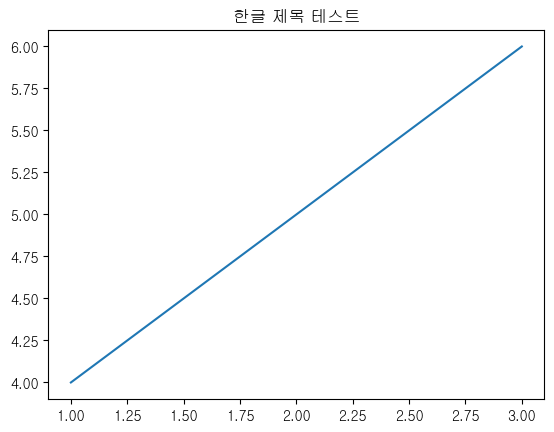

In [4]:
import matplotlib.pyplot as plt

# 폰트 경로 설정
font_path = 'C:\\Windows\\Fonts\\gulim.ttc'  # 이 경로는 시스템에 따라 다를 수 있습니다.

# 폰트 이름 설정
plt.rc('font', family='gulim')

# 그래프 그리기 예제
plt.title('한글 제목 테스트')
plt.plot([1, 2, 3], [4, 5, 6])
plt.show()

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
from matplotlib import font_manager, rc
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob
import nltk
import chardet

%matplotlib inline

# nltk 데이터 다운로드 (첫 실행 시 필요)
nltk.download('vader_lexicon')

# nltk 데이터 다운로드 (첫 실행 시 필요)
nltk.download('stopwords')

# 글꼴 경로 지정
font_path = "C:\\Windows\\Fonts\\gulim.ttc"  # 윈도우에 설치된 맑은 고딕 폰트 경로

# 폰트 이름 얻어오기
font_name = font_manager.FontProperties(fname=font_path).get_name()

# matplotlib의 rc(run command) 기능을 이용하여 글꼴 설정
mpl.rc('font', family='gulim')

# 유니코드에서  음수 부호 설정
mpl.rc('axes', unicode_minus=False)

raw = pd.read_csv('D:\에어비앤비\parisreview.csv')
df = raw.copy()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\evol0\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\evol0\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
df.columns

Index(['listing_id', 'id', 'date', 'reviewer_id', 'reviewer_name', 'comments'], dtype='object')

In [30]:
df = df[['listing_id','date','comments']]

df = df.rename(columns= {
    'listing_id' : '숙소_id',
    'date': '리뷰날짜',
    'comments' : '리뷰'
})

# 리뷰 결측치 제거
df = df[~df['리뷰'].isnull()]

# 리뷰 내의 <br> 제거
df['리뷰'] = df['리뷰'].str.replace('<br>\s*', ' ', regex=True)
df['리뷰'] = df['리뷰'].str.replace('<br/>\s*', ' ', regex=True)

In [28]:
import pandas as pd
import numpy as np
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk

# nltk 자원 다운로드 (VADER Lexicon)
nltk.download('vader_lexicon')


# 'comments' 열에서 NaN 값을 검사하고, 빈 문자열로 대체
df['리뷰'] = df['리뷰'].fillna('')

# 모든 리뷰를 문자열로 변환
df['리뷰'] = df['리뷰'].apply(str)

# 랜덤으로 100000개의 리뷰 샘플링
sampled_df = df.sample(n=100000, random_state=1)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\evol0\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [18]:
# 감성 분석기 초기화
sia = SentimentIntensityAnalyzer()

# 감성 점수 계산 함수
def analyze_sentiment(review):
    if review:  # 비어있지 않은 경우에만 감성 분석 실행
        return sia.polarity_scores(review)
    else:
        return {'neu': 1.0}  # 비어있는 리뷰는 중립적으로 처리

# 리뷰 텍스트에 대한 감성 점수 적용
sampled_df['sentiment'] = sampled_df['리뷰'].apply(analyze_sentiment)

# 결과 출력
print(sampled_df[['리뷰', 'sentiment']])


                                                        리뷰  \
1377572  petit pied à terre pour quelques nuits. douche...   
1505068  Très bel appartement et surtout très bien situ...   
594937   Posizione centrale e ben servita , appartament...   
997822   Bertrand Et Marion were very responsive and he...   
1227473  Julie’s apartment was a dream! It has everythi...   
...                                                    ...   
1206726                                            Superbe   
736716   Super appart pour famille calme dedans anime d...   
1377047  Loved staying here. Teddy was really helpful, ...   
1578664  Quite a good option, it’s worth adding a photo...   
778498   This is a perfect solution if you are looking ...   

                                                 sentiment  
1377572  {'neg': 0.172, 'neu': 0.828, 'pos': 0.0, 'comp...  
1505068  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...  
594937   {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...  
997822   {'

In [11]:
import pandas as pd
from nltk.sentiment import SentimentIntensityAnalyzer
from textblob import TextBlob

# 데이터 로드 및 샘플링

sampled_df = df.sample(n=100000, random_state=1)

# SentimentIntensityAnalyzer 초기화
sid = SentimentIntensityAnalyzer()

# 감성 분석 함수 정의
def analyze_sentiment(comment):
    # VADER 감성 분석
    vader_scores = sid.polarity_scores(comment)
    # TextBlob 감성 분석
    analysis = TextBlob(comment)
    textblob_score = analysis.sentiment.polarity
    
    return vader_scores, textblob_score

# 감성 분석 결과 적용
results = sampled_df['리뷰'].apply(lambda x: analyze_sentiment(str(x)))
sampled_df[['vader_sentiment', 'textblob_sentiment']] = pd.DataFrame(results.tolist(), index=sampled_df.index)

# VADER 점수 세부 항목 분리
sampled_df['부정'] = sampled_df['vader_sentiment'].apply(lambda x: x['neg'])
sampled_df['중립'] = sampled_df['vader_sentiment'].apply(lambda x: x['neu'])
sampled_df['긍정'] = sampled_df['vader_sentiment'].apply(lambda x: x['pos'])
sampled_df['전체'] = sampled_df['vader_sentiment'].apply(lambda x: x['compound'])

print(sampled_df.head())


                      숙소_id        리뷰날짜  \
1377572            51303034  2024-01-28   
1505068  629490271064394042  2023-02-22   
594937             14400284  2022-01-03   
997822             31020838  2023-08-04   
1227473            41628523  2022-06-29   

                                                        리뷰  \
1377572  petit pied à terre pour quelques nuits. douche...   
1505068  Très bel appartement et surtout très bien situ...   
594937   Posizione centrale e ben servita , appartament...   
997822   Bertrand Et Marion were very responsive and he...   
1227473  Julie’s apartment was a dream! It has everythi...   

                                           vader_sentiment  \
1377572  {'neg': 0.172, 'neu': 0.828, 'pos': 0.0, 'comp...   
1505068  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...   
594937   {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...   
997822   {'neg': 0.011, 'neu': 0.783, 'pos': 0.206, 'co...   
1227473  {'neg': 0.0, 'neu': 0.773, 'pos': 0.227, 'comp...

In [1]:

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
import pandas as pd

# NLTK 리소스 다운로드 (토큰화와 불용어 리스트를 위해)
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\evol0\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\evol0\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [10]:


# 'reviews' 컬럼에서 모든 텍스트를 하나의 문자열로 결합
text = ' '.join(df['리뷰'].astype(str))


In [11]:
# 소문자로 변환하여 일관성 유지
text = text.lower()

# 토큰화
tokens = word_tokenize(text)

# 불용어 제거: NLTK의 기본 영어 불용어 사용
stop_words = set(stopwords.words('english'))
filtered_tokens = [word for word in tokens if word not in stop_words and word.isalpha()]

# 빈도 계산
word_counts = Counter(filtered_tokens)

# 가장 흔한 단어와 그 빈도 출력
most_common_words = word_counts.most_common(20)
print(most_common_words)



KeyboardInterrupt: 

In [12]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
from concurrent.futures import ProcessPoolExecutor

# NLTK 리소스 다운로드
nltk.download('punkt')
nltk.download('stopwords')

def process_text(text):
    # 소문자 변환, 토큰화, 불용어 제거
    tokens = word_tokenize(text.lower())
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words and word.isalpha()]
    return filtered_tokens

def count_words(data):
    counter = Counter()
    for tokens in data:
        counter.update(tokens)
    return counter


# 데이터 분할
num_partitions = 10  # 병렬 처리를 위한 파티션 수
chunk_size = len(df) // num_partitions
texts = df['리뷰'].astype(str)

# 병렬 처리 설정
with ProcessPoolExecutor() as executor:
    # 각 청크에 대해 process_text 함수 실행
    tokens_list = list(executor.map(process_text, (texts[i:i + chunk_size] for i in range(0, len(texts), chunk_size))))
    
    # 결과 토큰 리스트를 하나로 합침
    total_counts = count_words(tokens_list)

# 가장 흔한 20개 단어 출력
print(total_counts.most_common(20))


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\evol0\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\evol0\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [1]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter

# NLTK 리소스 다운로드 (토큰화와 불용어 리스트를 위해)
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\evol0\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\evol0\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
raw = pd.read_csv('D:\에어비앤비\parisreview.csv')
df = raw.copy()

# 랜덤하게 20000개 샘플링
sampled_df = df.sample(n=20000, random_state=1)


In [7]:
def process_text(text):
    # 소문자 변환, 토큰화, 불용어 제거
    tokens = word_tokenize(text.lower())
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words and word.isalpha()]
    return filtered_tokens

# 모든 리뷰를 하나의 리스트로 토큰화
tokens = [token for review in sampled_df['리뷰'].astype(str) for token in process_text(review)]

# 단어 빈도 계산
word_counts = Counter(tokens)

# 가장 흔한 20개 단어 출력
most_common_words = word_counts.most_common(20)
print(most_common_words)


[('de', 36619), ('apartment', 36561), ('et', 35994), ('great', 33532), ('très', 31429), ('paris', 29379), ('stay', 27738), ('location', 26651), ('place', 25008), ('la', 21780), ('est', 19946), ('à', 19253), ('un', 18382), ('bien', 16910), ('metro', 16086), ('le', 14848), ('host', 14423), ('would', 14376), ('us', 14087), ('nice', 13651)]


In [11]:
words_df = pd.DataFrame(most_common_words, columns=['Word', 'Frequency'])

# DataFrame 출력
print(words_df)

         Word  Frequency
0          de      36619
1   apartment      36561
2          et      35994
3       great      33532
4        très      31429
5       paris      29379
6        stay      27738
7    location      26651
8       place      25008
9          la      21780
10        est      19946
11          à      19253
12         un      18382
13       bien      16910
14      metro      16086
15         le      14848
16       host      14423
17      would      14376
18         us      14087
19       nice      13651


In [12]:
pip install gensim


     ---------------------------------------- 24.0/24.0 MB 1.4 MB/s eta 0:00:00
     ---------------------------------------- 61.2/61.2 kB 1.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


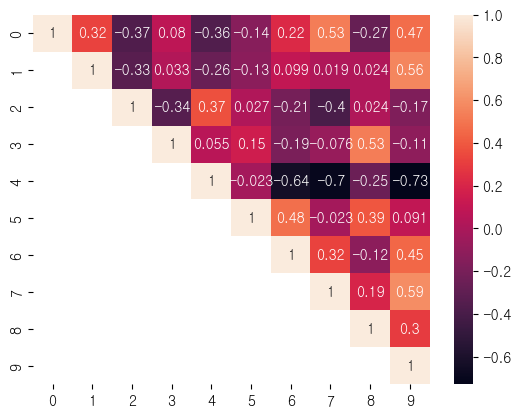

In [20]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 예시 데이터 생성
data = np.random.rand(10, 10)
correlation_matrix = np.corrcoef(data)

# 상삼각 행렬 추출
upper_tri = np.triu(correlation_matrix)

# 상삼각 행렬을 이용한 상관계수 행렬 시각화
sns.heatmap(upper_tri, annot=True, mask=upper_tri == 0)
plt.show()


In [22]:
pip install --upgrade gensim scipy numpy



     ---------------------------------------- 46.2/46.2 MB 3.0 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.0
    Uninstalling scipy-1.13.0:
      Successfully uninstalled scipy-1.13.0


ERROR: Could not install packages due to an OSError: [WinError 5] 액세스가 거부되었습니다: 'C:\\Users\\evol0\\AppData\\Local\\Programs\\Python\\Python310\\Lib\\site-packages\\~cipy.libs\\libopenblas_v0.3.26-382-gb1e8ba50--72a863714eca5a50b38260dedc0c2f3a.dll'
Consider using the `--user` option or check the permissions.


[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [24]:
import pandas as pd
#from gensim import corpora, models
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk

nltk.download('punkt')
nltk.download('stopwords')

# 데이터 로딩

documents = df['리뷰'].astype(str)

# 토큰화 및 불용어 제거
texts = [
    [word for word in word_tokenize(document.lower()) if word.isalpha() and word not in stopwords.words('french')]
    for document in documents
]

# 사전 생성
dictionary = corpora.Dictionary(texts)

# 문서-단어 행렬 생성
corpus = [dictionary.doc2bow(text) for text in texts]

# LDA 모델 훈련
lda_model = models.LdaModel(corpus, num_topics=10, id2word=dictionary, passes=15)

# 각 토픽의 주요 단어 출력
topics = lda_model.print_topics(num_words=5)
for topic in topics:
    print(topic)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\evol0\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\evol0\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


KeyboardInterrupt: 

In [25]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd


In [34]:
raw = pd.read_csv('D:\에어비앤비\parisreview.csv')
df = raw.copy()
documents = df['comments'].astype(str)


In [35]:
# CountVectorizer 초기화
# stop_words: 불용어 처리, max_features: 최대 특성(단어) 수 제한 (옵션)
vectorizer = CountVectorizer(stop_words='english', max_features=10000)

# 문서-단어 행렬 생성
X = vectorizer.fit_transform(documents)

# 사전 생성
dictionary = vectorizer.get_feature_names_out()


In [36]:
pip install stop-words


  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py install for stop-words: started
  Running setup.py install for stop-words: finished with status 'done'
Note: you may need to restart the kernel to use updated packages.


  DEPRECATION: stop-words is being installed using the legacy 'setup.py install' method, because it does not have a 'pyproject.toml' and the 'wheel' package is not installed. pip 23.1 will enforce this behaviour change. A possible replacement is to enable the '--use-pep517' option. Discussion can be found at https://github.com/pypa/pip/issues/8559

[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [38]:
from stop_words import get_stop_words
from nltk.corpus import stopwords

# 불용어 리스트 생성
english_stopwords = set(stopwords.words('english'))
french_stopwords = set(get_stop_words('fr'))
combined_stopwords = list(english_stopwords.union(french_stopwords))  # 리스트 형태로 변환

# CountVectorizer 설정
vectorizer = CountVectorizer(stop_words=combined_stopwords, max_features=10000)

# 데이터 로딩 및 토큰화
documents = ['your mixed language documents here']
X = vectorizer.fit_transform(documents)

# 사전 출력
print(vectorizer.get_feature_names_out())


['documents' 'language' 'mixed']


In [44]:
from sklearn.feature_extraction.text import CountVectorizer
from stop_words import get_stop_words
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')

# 영어 및 프랑스어 불용어 목록
english_stopwords = set(stopwords.words('english'))
french_stopwords = set(get_stop_words('fr'))
combined_stopwords = english_stopwords.union(french_stopwords)

# CountVectorizer 설정
vectorizer = CountVectorizer(stop_words=combined_stopwords, max_features=10000)

# 데이터 로딩 및 토큰화
documents = ['your mixed language documents here']
X = vectorizer.fit_transform(documents)

# 사전 출력
print(vectorizer.get_feature_names_out())


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\evol0\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


InvalidParameterError: The 'stop_words' parameter of CountVectorizer must be a str among {'english'}, an instance of 'list' or None. Got {'theirs', 'other', 'when', 'auriez', 'alors', 'ceci', 'sa', 'at', 'these', 'him', 'ait', 'très', 'in', 'yourself', 'seulement', 'shouldn', 'aura', 'moins', 'son', 'par', 'up', 'doesn', 'what', 'elle', 'be', 'aurait', 'mightn', 'why', 'nouveau', 'an', 'eût', 'more', 'leurs', 'those', 'wouldn', 'votre', 'it', 'on', 'soyez', 'being', "isn't", 'both', 'which', 'above', 'd', 'étaient', "mustn't", 'fussions', 're', "you'd", 'tout', 'sujet', 'la', 'que', 'ourselves', 'ayez', 'autre', 'through', 'ci', 'vois', 'serais', 'avons', 'ils', 'état', 'do', "didn't", 'hors', 'after', "you're", 'depuis', 'eus', 's', 'ont', 'has', 'or', 'this', 'voient', 've', 'fais', 'ça', 'devrons', 'le', 'avait', 'fussiez', 'nommé', 'nous', 'because', 'eûtes', 'devrez', 'here', 'while', 'es', "it's", 'étiez', 'fut', 'over', 'mon', 'further', 'before', 'there', 'so', 'il', 'mais', 'personne', 'auront', 'its', 'serait', 'fussent', 'again', 'hadn', 'moi', 'dès', 'devrait', 'fus', 'down', 'fois', 'seras', 'our', 'been', "hasn't", 'ta', 'n', 'ton', 'y', 'weren', 'vos', 'dos', 'we', 'avaient', 'sur', 'now', 'for', 'sien', 'fût', "don't", 'into', 'dehors', 'avoir', 'and', 'voit', 'aucun', 'eurent', 'my', 'furent', 'de', 'j', 'quelle', 'few', 'aren', 'même', 'vous', 'eusses', 'mes', 'une', "mightn't", 'peu', 'eu', 'eussions', 'wasn', "you'll", 'couldn', 'won', 'à', 'encore', 'haven', 'about', 'fûtes', 'lui', 'below', 'she', "wouldn't", 'off', 'serions', 'with', 'than', 'personnes', 'as', 'itself', 'but', 'au', 'force', 'avais', 'si', 'ne', 'toi', 'i', 'until', 'trop', 'didn', 'ai', 'te', 'his', 'own', "that'll", 'll', 'who', 'by', 'isn', 'début', 'under', 'eussent', 'parce', 'tellement', 'have', 'serai', 'you', 'comment', 'to', 'm', 'that', 'aient', 'doing', 'dans', 'valeur', "shan't", 'no', 'soi', 'quelles', "needn't", 'en', 'auraient', 'aurions', 'et', 'nor', 'ain', 'hasn', 'was', 'vont', 'eues', 'is', 'pour', 'faisez', "she's", 'elles', 'will', 'notre', 'seriez', 'aussi', 'aurons', 'ayant', 'fûmes', 'too', 'needn', 'such', 'cette', 'donc', 'soient', "shouldn't", 'can', "doesn't", 'sois', 'fusse', 'peut', 'from', 'qu', 'serez', 'eussiez', 'devriez', 'haut', 'me', 'comme', 'l', 'être', 'ce', 'droite', 'cet', 'devoir', 'nom', 'nommés', 'aurez', 'avez', "you've", 'where', 'ou', 'vu', 't', "won't", 'quels', 'during', 'étés', 'se', 'not', 'he', 'just', 'un', 'should', 'whom', 'did', 'est', 'deux', 'faire', 'yourselves', 'des', 'plupart', 'leur', 'hers', 'juste', 'ces', 'devront', 'quel', 'ceux', 'the', 'against', 'once', 'eûmes', 'eusse', 'nos', 'mot', 'sans', 'shan', 'seraient', 'soit', 'avec', 'only', 'tes', 'myself', 'devrions', 'là', "weren't", 'suis', 'themselves', 'aies', 'parole', 'tu', 'himself', 'are', 'dedans', 'font', 'où', 'out', "haven't", 'most', 'étions', "wasn't", "aren't", "should've", 'maintenant', 'sont', 'am', 'nouveaux', 'then', 'any', 'them', 'eux', 'aviez', 'aurais', 'je', 'having', 'their', 'eut', 'nommée', 'of', 'avant', 'eue', 'ici', 'tous', 'seront', 'same', 'ours', 'bon', 'had', 'each', 'doit', 'don', "hadn't", 'herself', 'ses', 'if', 'fait', 'cela', 'êtes', 'sommes', 'were', 'serons', 'mustn', 'étais', 'her', 'soyons', 'du', 'o', 'fusses', 'tandis', 'chaque', 'ni', 'does', 'sera', 'tels', 'between', 'été', 'how', 'dois', 'a', 'some', 'auras', 'your', 'qui', 'car', 'étant', 'les', 'they', 'yours', 'pas', 'quand', 'avions', 'very', 'était', 'aie', 'dù', 'faites', 'sous', 'aux', 'all', 'aurai', 'ayons', 'ma', "couldn't", 'pourquoi'} instead.

In [42]:
import spacy

# 언어 모델 로드
nlp_en = spacy.load('en_core_web_sm')
nlp_fr = spacy.load('fr_core_news_sm')

# 혼합된 텍스트를 언어별로 처리 (예시)
text = "Welcome to Paris, bienvenue à Paris"
doc_en = nlp_en(text)
doc_fr = nlp_fr(text)

# 토큰 출력
tokens_en = [token.text for token in doc_en]
tokens_fr = [token.text for token in doc_fr]

print("English tokens:", tokens_en)
print("French tokens:", tokens_fr)


English tokens: ['Welcome', 'to', 'Paris', ',', 'bienvenue', 'à', 'Paris']
French tokens: ['Welcome', 'to', 'Paris', ',', 'bienvenue', 'à', 'Paris']


In [3]:
import spacy
import pandas as pd
from gensim import corpora, models

# spaCy 언어 모델 로드
nlp = spacy.load('en_core_web_sm')  # 사용할 언어에 따라 모델 선택

# CSV 파일 로드
raw = pd.read_csv('D:\에어비앤비\parisreview.csv')
df = raw.copy() # 파일 경로와 파일 이름 확인
data = df['comments'].astype(str).tolist()  # 'review_column_name'을 실제 리뷰 데이터가 저장된 컬럼 이름으로 변경

# spaCy를 사용한 토큰화 및 불용어 처리
texts = []
for doc in nlp.pipe(data):
    tokens = [token.lemma_ for token in doc if not token.is_stop and not token.is_punct and token.lemma_.isalpha()]
    texts.append(tokens)

# 사전과 문서-단어 행렬 생성
dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

# LDA 모델 학습
lda_model = models.LdaModel(corpus, num_topics=3, id2word=dictionary, passes=15, random_state=42)

# 각 토픽의 주요 단어 출력
topics = lda_model.print_topics(num_words=5)
for topic in topics:
    print(topic)


KeyboardInterrupt: 

In [6]:
import spacy
import pandas as pd
from gensim.models import LdaMulticore
from gensim import corpora
from spacy.lang.en import English

# spaCy 언어 모델 로드
nlp = spacy.load('en_core_web_sm')

# 데이터 로드
raw = pd.read_csv('D:\에어비앤비\parisreview.csv')
df = raw.copy()
data = df['comments'].astype(str).tolist()  # 'review_column_name'을 실제 리뷰 데이터가 있는 컬럼명으로 변경

# spaCy를 사용한 토큰화 및 불용어 처리
texts = []
for doc in nlp.pipe(data):
    tokens = [token.lemma_ for token in doc if not token.is_stop and not token.is_punct and token.lemma_.isalpha()]
    texts.append(tokens)

# 사전과 문서-단어 행렬 생성
dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

# LDA 멀티코어 모델 학습
lda_model = LdaMulticore(
    corpus,
    num_topics=3,
    id2word=dictionary,
    passes=15,
    workers=4  # 사용 가능한 CPU 코어 수에 따라 조정
)

# 각 토픽의 주요 단어 출력
topics = lda_model.print_topics(num_words=5)
for topic in topics:
    print(topic)


KeyboardInterrupt: 

In [7]:
import spacy
import pandas as pd
from gensim.models import LdaMulticore
from gensim import corpora
from spacy.lang.en import English

# spaCy 언어 모델 로드
nlp = spacy.load('en_core_web_sm')

# 데이터 로드 및 랜덤 샘플링
raw = pd.read_csv('D:\에어비앤비\parisreview.csv')
df = raw.copy()
sampled_df = df.sample(n=20000, random_state=42)  # 무작위로 20,000개의 샘플 선택
data = sampled_df['comments'].astype(str).tolist()  # 'review_column_name'을 실제 리뷰 데이터가 있는 컬럼명으로 변경

# spaCy를 사용한 토큰화 및 불용어 처리
texts = []
for doc in nlp.pipe(data):
    tokens = [token.lemma_ for token in doc if not token.is_stop and not token.is_punct and token.lemma_.isalpha()]
    texts.append(tokens)

# 사전과 문서-단어 행련 생성
dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

# LDA 멀티코어 모델 학습
lda_model = LdaMulticore(
    corpus,
    num_topics=3,
    id2word=dictionary,
    passes=15,
    workers=4  # 사용 가능한 CPU 코어 수에 따라 조정
)

# 각 토픽의 주요 단어 출력
topics = lda_model.print_topics(num_words=5)
for topic in topics:
    print(topic)


(0, '0.040*"et" + 0.034*"très" + 0.029*"de" + 0.021*"à" + 0.016*"bien"')
(1, '0.015*"y" + 0.015*"de" + 0.012*"und" + 0.010*"muy" + 0.010*"es"')
(2, '0.025*"apartment" + 0.024*"stay" + 0.023*"great" + 0.019*"place" + 0.018*"location"')
